# Lab - Projeto de filtro

Esta atividade consiste em projetar diferentes filtros IIR e FIR com a menor ordem para atender uma mesma especificação.

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

In [1]:
from pylab import *
from scipy.signal import *
from tabulate import tabulate

Projete filtros IIR (Butterworth, Chebyshev tipo 1, Chebyshev tipo 2, Elíptico) e FIR (janela de Kaiser, Equiripple (Parks-McLellan)) com a menor ordem que atendam a seguinte especificação:

Passa-baixas<br>
Frequencia da extremidade da banda passante: $0.22\pi$<br>
Ganho máximo na banda passante: 0 dB<br>
Ganho mínimo na banda passante: -1 dB<br>
Frequencia da extremidade da banda de rejeição: $0.29\pi$<br>
Ganho máximo na banda de rejeição: -40 dB<br>


1) Plotar a magnitude dos ganhos no mesmo gráfico em escala linear e logaritmica.

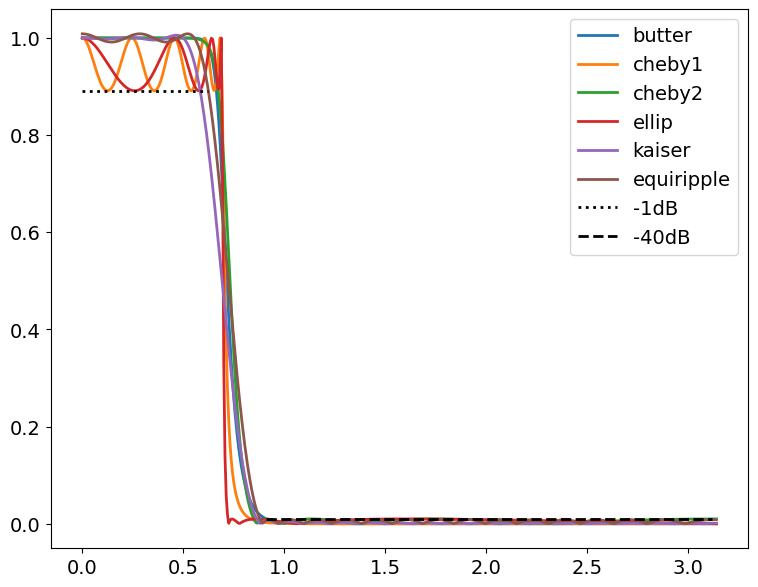

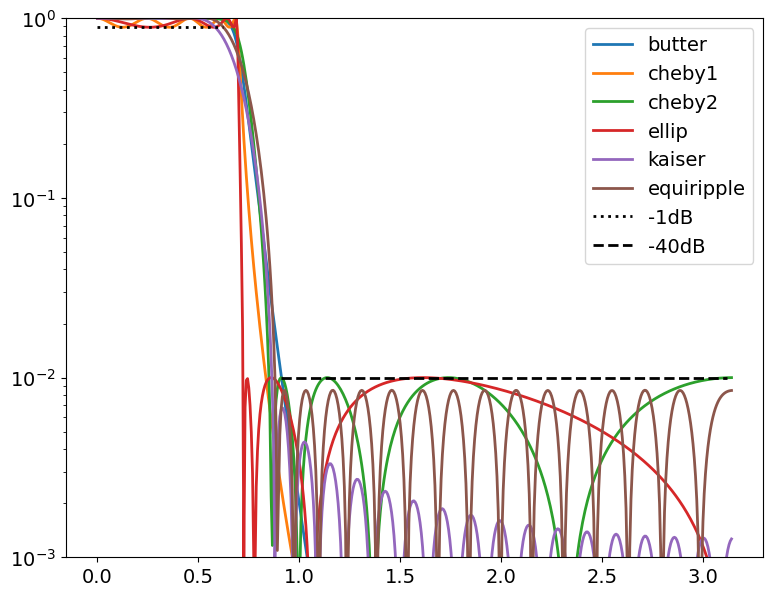

In [2]:
# Parâmetros do filtro Butterworth, filtro passa-baixa
N_butter = 15; Wn_butter = 0.22

# Parâmetros do filtro Chebyshev tipo 1, a amplificação na frequência de corte Omega 0
N_cheby1 = 9; Wn_cheby1 = 0.22; rp_cheby1 = 1

# Parâmetros do filtro Chebyshev tipo 2, é relacionado à atenuação da banda rejeitada
N_cheby2 = 8; Wn_cheby2 = 0.27; rs_cheby2 = 40

# Parâmetros do filtro Elíptico, uma ondulação permitida tanto na banda de 
# passagem quanto na banda de rejeição.
# f de corte normalizada varia de 0 a 1, representa metade da taxa de Nyquist
N_ellip = 7; Wn_ellip = 0.22; rp_ellip = 1; rs_ellip = 40

# Parâmetros da Janela de Kaiser
# otimiza a transição entre a banda de passagem e a banda de rejeição,
# minimizando a largura do lóbulo principal
N_kaiser = 42; Wn_kaiser = 0.22; window_kaiser = (('kaiser', 3.5)); 

# Parâmetros do filtro Equiripple
# Esta função utiliza o método dos mínimos quadrados para otimizar a resposta do 
# filtro para atender às especificações fornecidas nas diferentes bandas.
N_ripple = 40; Wn_ripple = [0, 0.09, 0.14, 0.5]; ganhos = [1, 0];

# Define o tipo de filtro como 'lowpass'
btype = 'lowpass'

# Coeficientes dos filtros para cada método
b_butter, a_butter = butter(N_butter, Wn_butter, btype)
b_cheby1, a_cheby1 = cheby1(N_cheby1, rp_cheby1, Wn_cheby1, btype)
b_cheby2, a_cheby2 = cheby2(N_cheby2, rs_cheby2, Wn_cheby2, btype)
b_ellip, a_ellip = ellip(N_ellip, rp_ellip, rs_ellip, Wn_ellip, btype)
b_kaiser = firwin(N_kaiser + 1, Wn_kaiser, window=window_kaiser, pass_zero=btype)
b_ripple = remez(N_ripple + 1, Wn_ripple, ganhos)

# Frequência e resposta em frequência para cada filtro
w1, resp_freq_butter = freqz(b_butter, a_butter)
w2, resp_freq_cheby1 = freqz(b_cheby1, a_cheby1)
w3, resp_freq_cheby2 = freqz(b_cheby2, a_cheby2)
w4, resp_freq_ellip = freqz(b_ellip, a_ellip)
w5, resp_freq_kaiser = freqz(b_kaiser, 1) 
w6, resp_freq_ripple = freqz(b_ripple, 1)

# Cria um vetor x de valores igualmente espaçados
x = arange(100)
# Cria vetores db1 e db40 para plotagem dos limites de -1dB e -40dB
db1 = 0*x + 10**(-1/20)
db40 = 0*x + 10**(-40/20)

# Configurações de plotagem
rcParams['font.size'] = 14
rcParams['lines.linewidth'] = 2

# Primeiro gráfico: Resposta em frequência linear
figure(figsize=(9,7))
plot(linspace(0, pi, len(resp_freq_butter)), abs(resp_freq_butter), label='butter')
plot(linspace(0, pi, len(resp_freq_cheby1)), abs(resp_freq_cheby1), label='cheby1')
plot(linspace(0, pi, len(resp_freq_cheby2)), abs(resp_freq_cheby2), label='cheby2')
plot(linspace(0, pi, len(resp_freq_ellip)), abs(resp_freq_ellip), label='ellip')
plot(linspace(0, pi, len(resp_freq_kaiser)), abs(resp_freq_kaiser), label='kaiser')
plot(linspace(0, pi, len(resp_freq_ripple)), abs(resp_freq_ripple), label='equiripple')
plot(linspace(0, 0.2*pi, 100, endpoint=False), db1, ':k', label='-1dB')
plot(linspace(0.29*pi, pi, 100, endpoint=False), db40, '--k', label='-40dB')
legend()
show()

# Segundo gráfico: Resposta em frequência logarítmica
figure(figsize=(9,7))
plot(linspace(0, pi, len(resp_freq_butter)), abs(resp_freq_butter), label='butter')
plot(linspace(0, pi, len(resp_freq_cheby1)), abs(resp_freq_cheby1), label='cheby1')
plot(linspace(0, pi, len(resp_freq_cheby2)), abs(resp_freq_cheby2), label='cheby2')
plot(linspace(0, pi, len(resp_freq_ellip)), abs(resp_freq_ellip), label='ellip')
plot(linspace(0, pi, len(resp_freq_kaiser)), abs(resp_freq_kaiser), label='kaiser')
plot(linspace(0, pi, len(resp_freq_ripple)), abs(resp_freq_ripple), label='equiripple')
plot(linspace(0, 0.2*pi, 100, endpoint=False), db1, ':k', label='-1dB')
plot(linspace(0.29*pi, pi, 100, endpoint=False), db40, '--k', label='-40dB')
yscale('log')  # Configura escala logarítmica no eixo y
ylim(10**-3, 1)  # Define limites para o eixo y
legend()
show()


2) Resumir numa tabela, a ordem de cada filtro, a frequência de corte normalizada e o valor beta do filtro de Kaiser.

In [3]:
# Define os cabeçalhos da tabela
headers = ["Filtro", "Ordem", "Freq", "Beta"]

# Crie uma tabela com informações sobre cada filtro
table = [
    ["Butterworth", N_butter, Wn_butter, "-"],
    ["Chebyshev tipo 1", N_cheby1, Wn_cheby1, "-"],
    ["Chebyshev tipo 2", N_cheby2, Wn_cheby2, "-"],
    ["Elíptico", N_ellip, Wn_ellip, "-"],
    ["Janela de Kaiser", N_kaiser, Wn_kaiser, window_kaiser[1]],
    ["Equiripple", N_ripple, Wn_ripple[1], "-"]
]

# Mostra na tela a tabela usando a biblioteca tabulate
print(tabulate(table, headers, tablefmt="simple", colalign=("left", "center", "center", "center")))


Filtro             Ordem    Freq    Beta
----------------  -------  ------  ------
Butterworth         15      0.22     -
Chebyshev tipo 1     9      0.22     -
Chebyshev tipo 2     8      0.27     -
Elíptico             7      0.22     -
Janela de Kaiser    42      0.22    3.5
Equiripple          40      0.09     -
